<IPython.core.display.Javascript object>


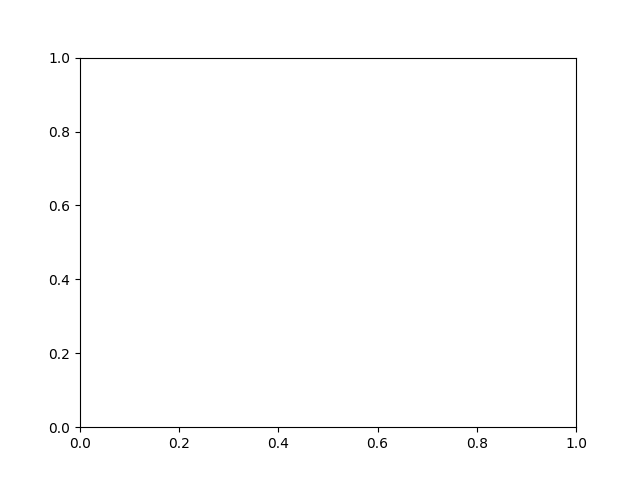

KeyboardInterrupt: 

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as clrs
import matplotlib.cm as cm

# data with 2 columns
X = np.linspace(0,2,1000)
Y1 = X**2 + np.random.random(X.shape)
Y2 = Y1 + 1
Y3 = Y2 + 1
Y4 = Y3 + 1
Y5 = Y4 + 1
df = pd.DataFrame([Y1, Y2, Y3, Y4, Y5]).transpose()
df.columns = ["Y1", "Y2", "Y3", "Y4", "Y5"]

def add_n_rows(df, n):
    X = np.linspace(0, 2, n)
    Y1 = X**2 + np.random.random(X.shape)
    Y2 = Y1 + 1
    Y3 = Y2 + 1
    Y4 = Y3 + 1
    Y5 = Y4 + 1
    new_df = pd.DataFrame([Y1, Y2, Y3, Y4, Y5]).transpose()
    new_df.columns = ["Y1", "Y2", "Y3", "Y4", "Y5"]
    res_df = pd.concat([df, new_df], axis=0)
    res_df.index = range(res_df.shape[0])
    return res_df

def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap

# update function
def plotObject(df, ax, fig, alpha =0.7, scm=None):
    ax.clear()
    for i in range (0, df.shape[1]):
        ax.plot(df.index, df.iloc[:, i],
                # label = 'Layer ' + str(df.shape[1]-i),
                color= scm.to_rgba(df.shape[1]-i, alpha=alpha))
    fig.canvas.draw()
    return fig, ax


# colors
cmap_name = "jet"
scm = create_color_step_obj(cmap_name, df.shape[1])

# initialize figure and interactivity
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

# initialize canvas
fig.show()
fig.canvas.draw()

# set labels and legend
ax.set_xlabel('Index')
ax.set_ylabel('Tem, C', color='r')
# plt.legend (bbox_to_anchor=(1.4,0.89), fontsize='xx-small', loc='upper right', ncol=2)

while True:
    df = add_n_rows(df, 2)
    fig, ax = plotObject(df, ax, fig, alpha=0.7, scm=scm)